In [1]:
import pandas as pd
import mplcyberpunk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

plt.style.use('cyberpunk')

In [2]:
data = pd.read_csv("../cleaned/CampaignPerformance.csv")

In [3]:
data.isnull().sum()

dates                  0
campaign_name          0
campaign_start_date    0
creative_name          0
total_spent            0
impressions            0
clicks                 0
click_through_rate     0
leads                  0
platform               0
adset_name             0
dtype: int64

In [4]:
data['dates'] = pd.to_datetime(data['dates'])

## <b>Feature Engineering</b>

In [5]:
data['cpc'] = data['total_spent'] / ( data['clicks'] + 1 )
data['cpl'] = data['total_spent'] / ( data['leads'] + 1)

In [6]:
data.describe()

,total_spent,impressions,clicks,click_through_rate,leads,cpc,cpl
count,27948.000000,27948.000000,27948.000000,27948.000000,27948.000000,27948.000000,27948.000000
mean,559.133872,2386.341241,18.719801,1.351248,1.151043,32.637031,202.059366
std,1473.100298,8049.391961,79.100485,5.555901,3.988680,51.680143,434.538552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.530000,13.000000,0.000000,0.000000,0.000000,4.330000,5.450000
50%,53.600000,108.000000,1.000000,0.332196,0.000000,19.410000,46.535000
75%,428.072500,1269.250000,9.000000,0.847458,1.000000,42.901023,204.748125
max,27125.360000,196585.000000,3361.000000,200.000000,153.000000,1431.330000,10365.930000


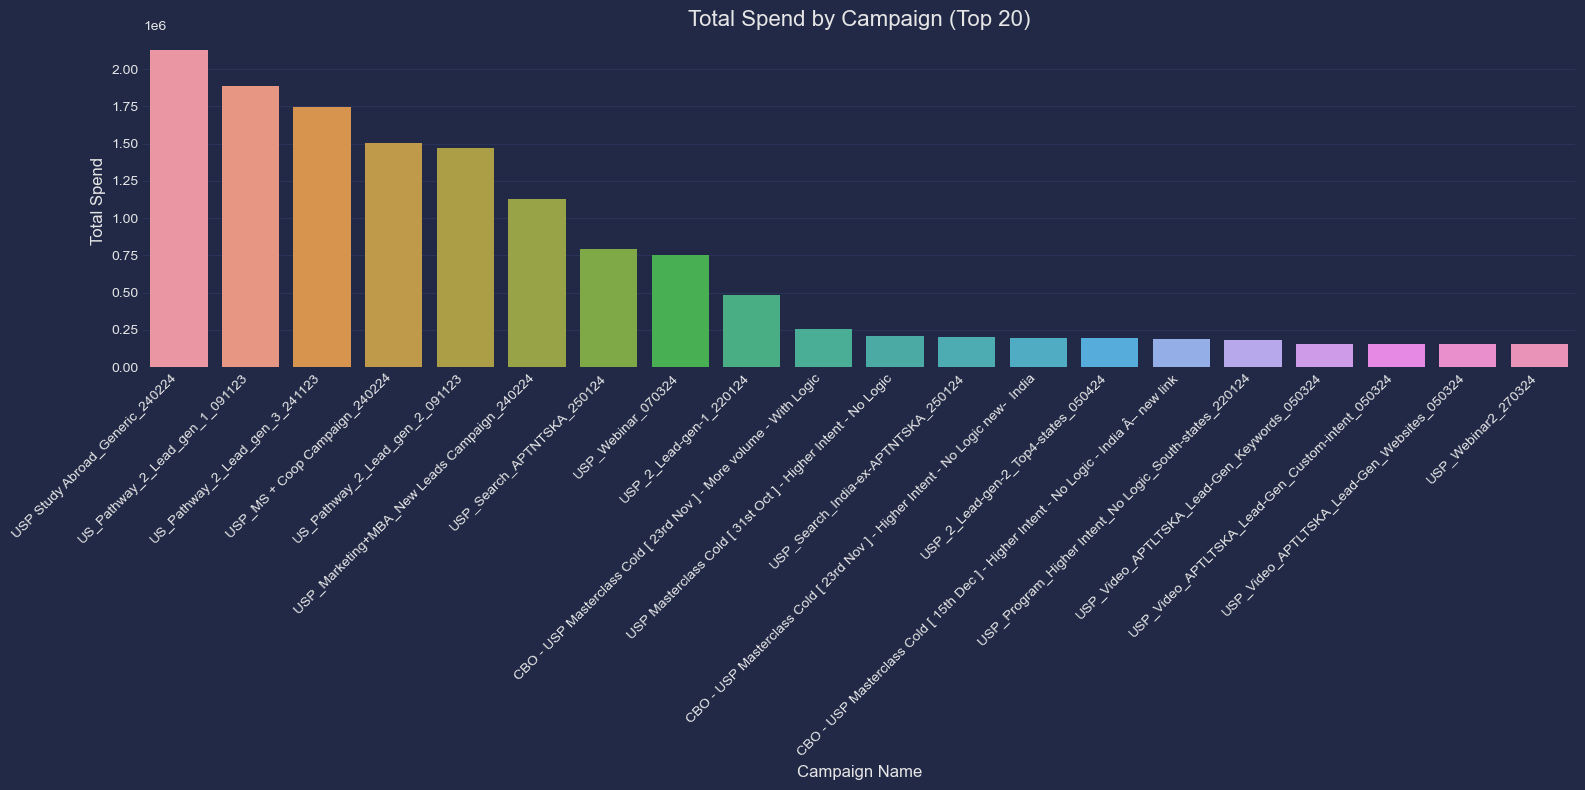

In [7]:
campaign_spend = data.groupby('campaign_name')['total_spent'].sum().sort_values(ascending=False)

# Get the top 20 campaigns
top_20_campaigns = campaign_spend.head(20)

# Create the plot
plt.figure(figsize=(16, 8))
sns.barplot(x=top_20_campaigns.index, y=top_20_campaigns.values)
plt.title('Total Spend by Campaign (Top 20)', fontsize=16)
plt.xlabel('Campaign Name', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

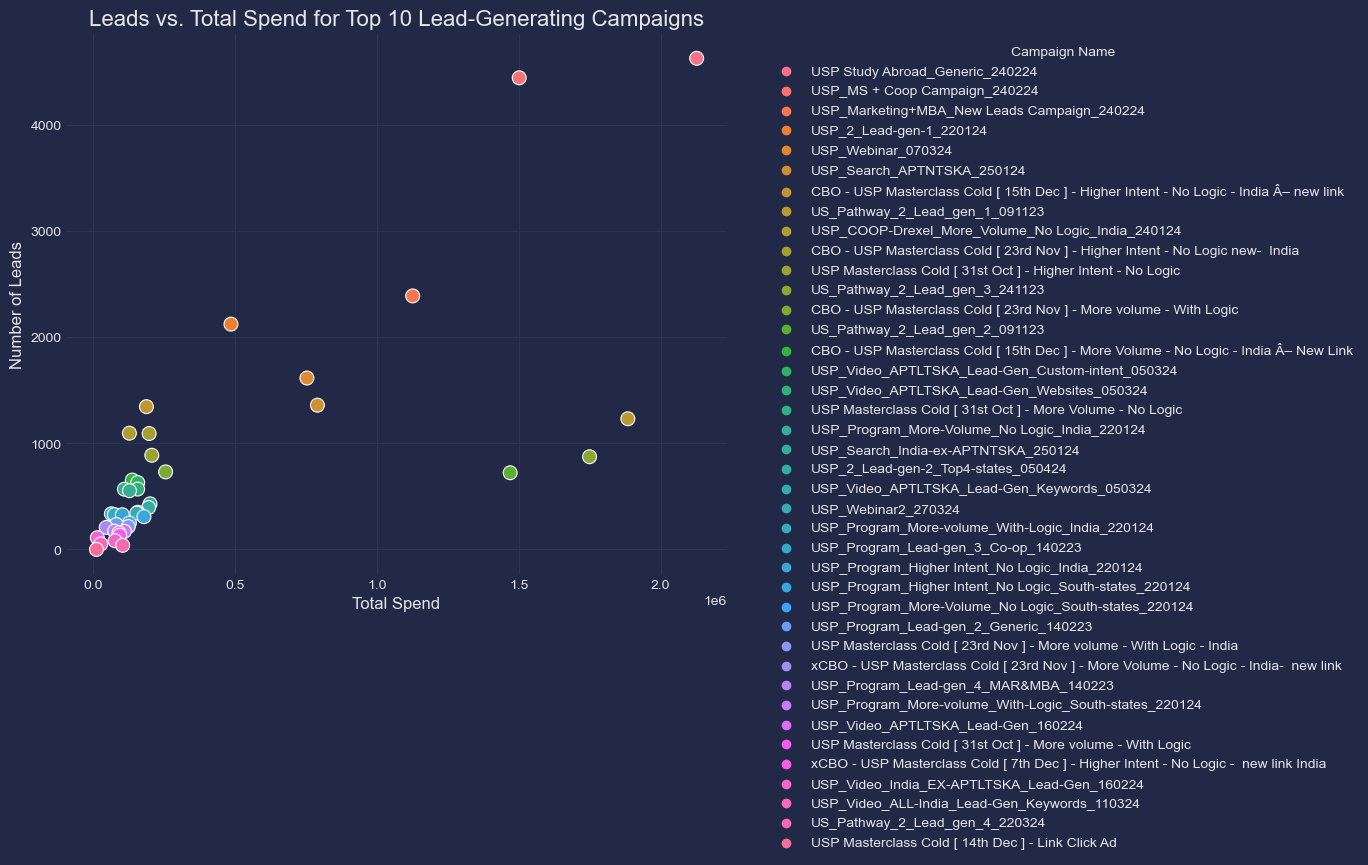

In [8]:
campaign_performance = data.groupby('campaign_name').agg({
    'leads': 'sum',
    'total_spent': 'sum'
}).reset_index()

# Sort by leads in descending order and get the top 10
top_40_campaigns = campaign_performance.sort_values('leads', ascending=False).head(40)

# Create the plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='total_spent', y='leads', hue='campaign_name', data=top_40_campaigns, s=100)
plt.title('Leads vs. Total Spend for Top 10 Lead-Generating Campaigns', fontsize=16)
plt.xlabel('Total Spend', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.legend(title='Campaign Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
adset_performance = data.groupby('adset_name').agg({
    'total_spent': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'leads': 'sum'
}).reset_index()

adset_performance['ctr'] = adset_performance['clicks'] / adset_performance['impressions']
adset_performance['cpc'] = adset_performance['total_spent'] / adset_performance['clicks']
adset_performance['cpl'] = adset_performance['total_spent'] / adset_performance['leads']

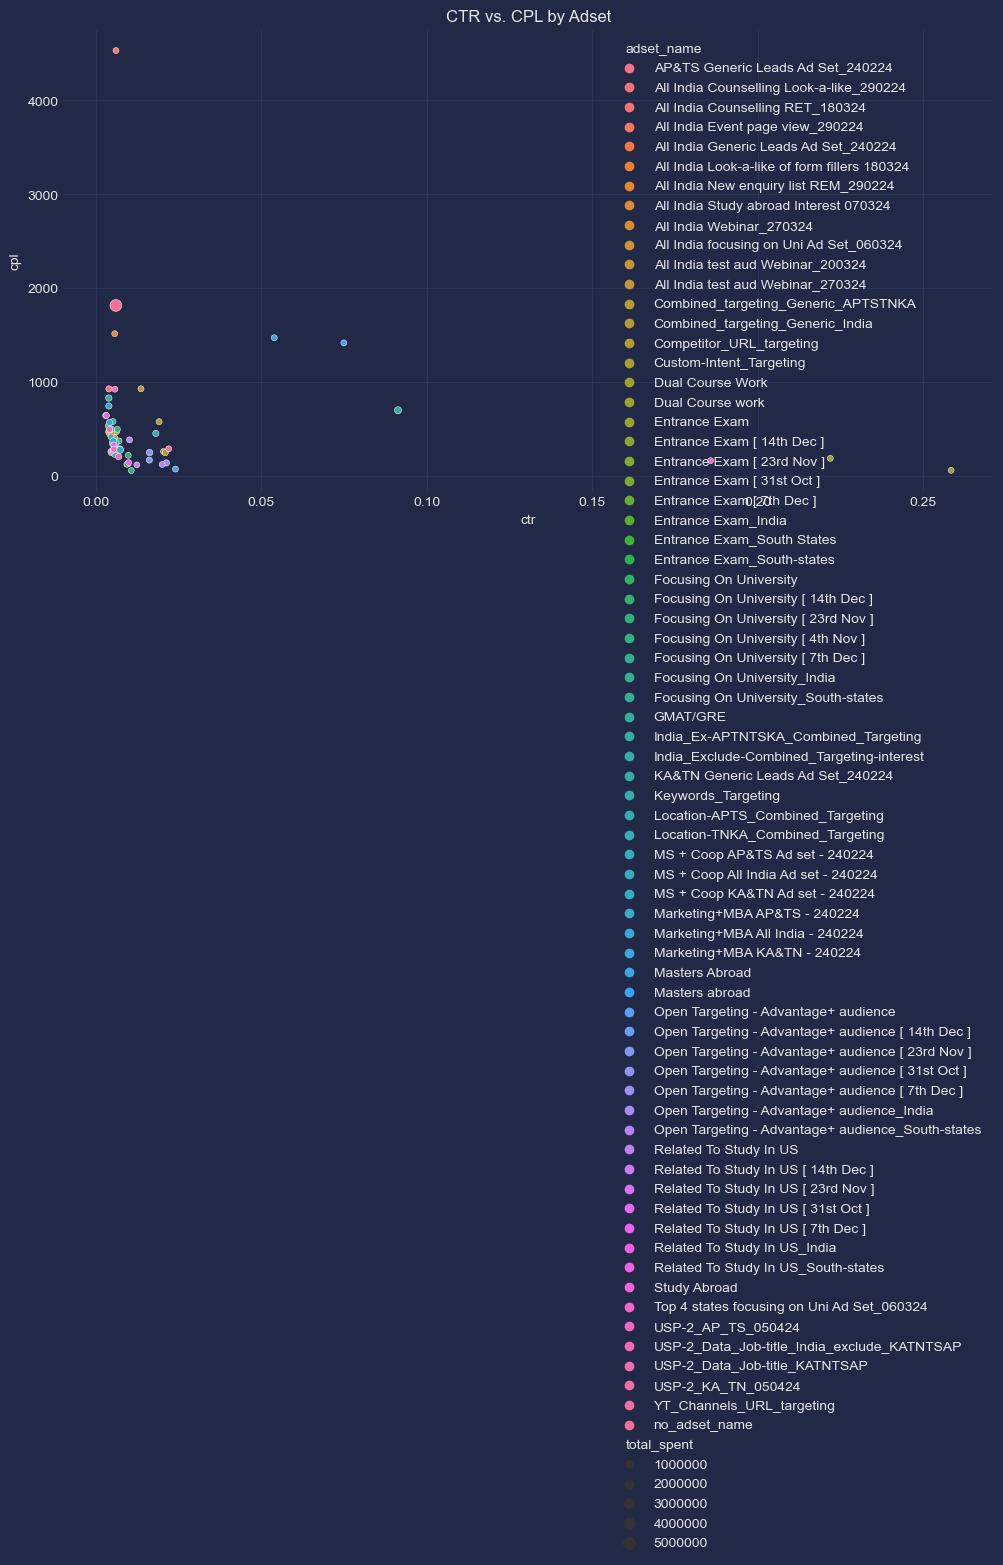

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ctr', y='cpl', size='total_spent', hue='adset_name', data=adset_performance)
plt.title('CTR vs. CPL by Adset')
plt.show()

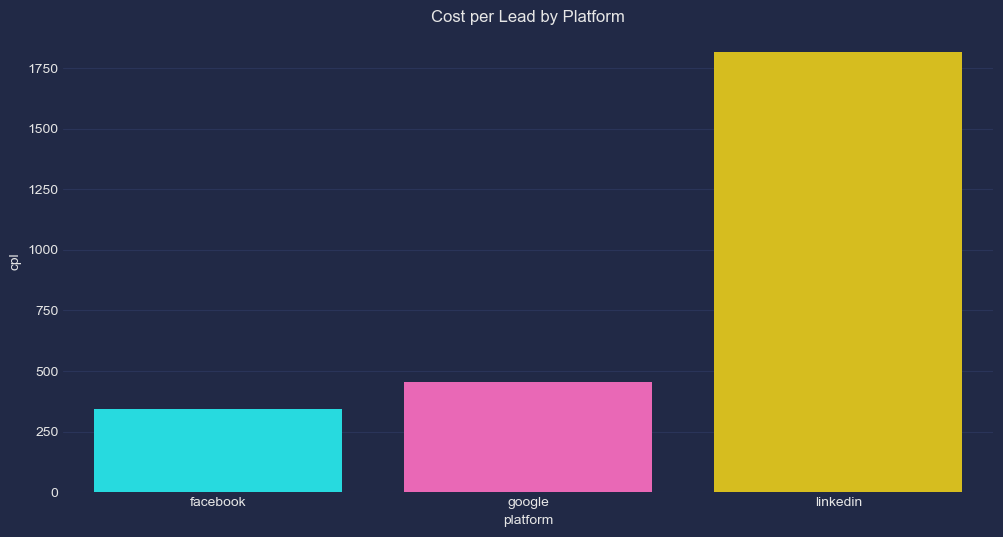

In [11]:
platform_performance = data.groupby('platform').agg({
    'total_spent': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'leads': 'sum'
}).reset_index()

platform_performance['ctr'] = platform_performance['clicks'] / platform_performance['impressions']
platform_performance['cpc'] = platform_performance['total_spent'] / platform_performance['clicks']
platform_performance['cpl'] = platform_performance['total_spent'] / platform_performance['leads']

plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='cpl', data=platform_performance)
plt.title('Cost per Lead by Platform')
plt.show()

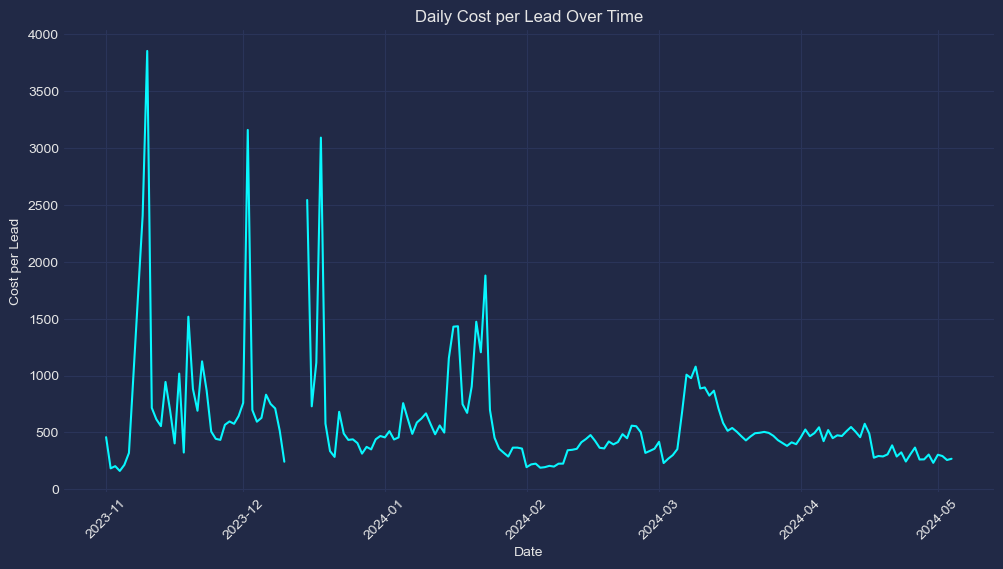

In [12]:
daily_performance = data.groupby('dates').agg({
    'total_spent': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'leads': 'sum'
}).reset_index()

daily_performance['ctr'] = daily_performance['clicks'] / daily_performance['impressions']
daily_performance['cpc'] = daily_performance['total_spent'] / daily_performance['clicks']
daily_performance['cpl'] = daily_performance['total_spent'] / daily_performance['leads']

plt.figure(figsize=(12, 6))
plt.plot(daily_performance['dates'], daily_performance['cpl'])
plt.title('Daily Cost per Lead Over Time')
plt.xlabel('Date')
plt.ylabel('Cost per Lead')
plt.xticks(rotation=45)
plt.show()

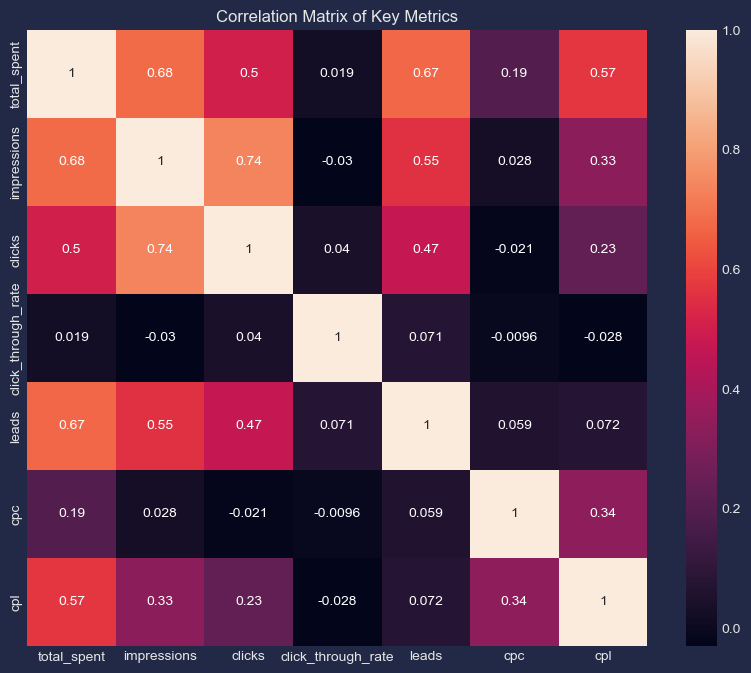

In [13]:
correlation_matrix = data[['total_spent', 'impressions', 'clicks', 'click_through_rate', 'leads', 'cpc', 'cpl']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Key Metrics')
plt.show()

## <b>Targets Included</b>

In [14]:
data2 = pd.read_csv("../Customer Acquisition/CombinedCustomers2.csv")

In [15]:
data2.columns

Index(['lead_id', 'created_time', 'Ad Name', 'Campaign Name', 'form_name',
       'platform', 'lead_id.1', 'graduation_degree', 'graduation_percentage',
       'work_experience', 'mapped', 'contacted', 'lsq_lead_stage',
       'lsq_lead_owner', 'lsq_source', 'Lead Id', 'inbound_phone_call_counter',
       'outbound_phone_call_counter', 'call_duration_sec', 'tokens_paid',
       'Target'],
      dtype='object')

In [16]:
data2 = data2[data2['Target']==1]

In [20]:
data.columns

Index(['dates', 'campaign_name', 'campaign_start_date', 'creative_name',
       'total_spent', 'impressions', 'clicks', 'click_through_rate', 'leads',
       'platform', 'adset_name', 'cpc', 'cpl', 'conversion_rate',
       'estimated_revenue', 'ROI'],
      dtype='object')

In [52]:
data['conversion_rate'] = data['leads']/(data['clicks']+1)

In [53]:
lead_to_customer_rate = 264/32170
lead_to_customer_rate
value_per_lead = 400000
data['estimated_revenue'] = data['leads'] * value_per_lead
data['ROI'] = (data['estimated_revenue'] - data['total_spent']) / (data['total_spent']+1) * 100

In [54]:
df = data

In [55]:
data['creative_name'].replace(' --',"No Creative Name", inplace=True)

In [56]:
creative_performance = df.groupby('creative_name').agg({
    'click_through_rate': 'mean',
    'leads': 'sum'
}).sort_values('leads', ascending=False).head(5)

print("\nTop 5 Performing Creatives:")
print(creative_performance)


Top 5 Performing Creatives:
                                               click_through_rate   leads
creative_name                                                            
#6 ( Graphic ) - Master's Degree In 12 Months            0.752663  8387.0
USP_kavita&steffi_VideoAd6                               0.673875  3013.0
USP_RIT_1_Getpaid                                        0.656261  2646.0
No Creative Name                                         9.610731  1790.0
#8 ( Graphic ) - Study In The USA                        1.407570  1313.0


In [57]:
adset_performance = df.groupby('adset_name').agg({
    'click_through_rate': 'mean',
    'leads': 'sum'
}).sort_values('leads', ascending=False).head(5)

print("\nTop 5 Performing Adsets:")
print(adset_performance)


Top 5 Performing Adsets:
                                                   click_through_rate   leads
adset_name                                                                   
no_adset_name                                                0.680731  2868.0
MS + Coop All India Ad set - 240224                          2.151338  2341.0
All India Counselling Look-a-like_290224                     3.765800  1884.0
Open Targeting - Advantage+ audience [ 31st Oct ]            2.267013  1553.0
USP-2_Data_Job-title_India_exclude_KATNTSAP                  3.072852  1505.0


In [58]:
engagement_metrics = df.groupby('campaign_name').agg({
    'click_through_rate': 'mean',
    'impressions': 'sum',
    'clicks': 'sum'
}).sort_values('click_through_rate', ascending=False).head(5)

print("\nTop 5 Engaging Campaigns:")
print(engagement_metrics)


Top 5 Engaging Campaigns:
                                                  click_through_rate  \
campaign_name                                                          
USP_Search_APTNTSKA_250124                                 11.497189   
USP_Search_India-ex-APTNTSKA_250124                         6.364913   
USP_Video_APTLTSKA_Lead-Gen_Custom-intent_050324            2.984551   
USP_Video_ALL-India_Lead-Gen_Keywords_110324                2.669778   
USP_Video_APTLTSKA_Lead-Gen_Websites_050324                 2.620531   

                                                  impressions  clicks  
campaign_name                                                          
USP_Search_APTNTSKA_250124                             178830   21663  
USP_Search_India-ex-APTNTSKA_250124                     88614    3836  
USP_Video_APTLTSKA_Lead-Gen_Custom-intent_050324      1220168   25558  
USP_Video_ALL-India_Lead-Gen_Keywords_110324           442455   10896  
USP_Video_APTLTSKA_Lead-Gen_Websites

In [59]:
scaling_opportunities = df.groupby('campaign_name').agg({
    'total_spent': 'sum',
    'leads': 'sum',
    'cpl': 'mean'
}).sort_values('cpl').head(10)

print("\nTop 10 Campaigns for Potential Scaling:")
print(scaling_opportunities)


Top 10 Campaigns for Potential Scaling:
                                                    total_spent   leads  \
campaign_name                                                             
xCBO - USP Masterclass Cold [ 7th Dec ] - Highe...     13562.84   111.0   
CBO - USP Masterclass Cold [ 15th Dec ] - Highe...    186700.48  1346.0   
xCBO - USP Masterclass Cold [ 23rd Nov ] - More...     44937.43   208.0   
CBO - USP Masterclass Cold [ 23rd Nov ] - Highe...    196255.37  1093.0   
CBO - USP Masterclass Cold [ 15th Dec ] - More ...    136833.11   654.0   
USP Masterclass Cold [ 31st Oct ] - More Volume...    109113.64   568.0   
USP Masterclass Cold [ 31st Oct ] - Higher Inte...    205642.99   888.0   
USP_Program_More-volume_With-Logic_India_220124        63193.02   336.0   
CBO - USP Masterclass Cold [ 23rd Nov ] - More ...    254353.16   731.0   
USP_COOP-Drexel_More_Volume_No Logic_India_240124     126657.36  1096.0   

                                                          

In [60]:
data.columns

Index(['dates', 'campaign_name', 'campaign_start_date', 'creative_name',
       'total_spent', 'impressions', 'clicks', 'click_through_rate', 'leads',
       'platform', 'adset_name', 'cpc', 'cpl', 'conversion_rate',
       'estimated_revenue', 'ROI'],
      dtype='object')

In [61]:
data.to_csv("campaignOptimization.csv", header=True, index=False)

In [69]:
data[data['dates']=='2024-02-17']['leads'].sum()

211.0

In [70]:
data[data['dates']=='2024-02-17']['campaign_name'].unique()

array(['USP_Video_APTLTSKA_Lead-Gen_160224',
       'USP_Video_India_EX-APTLTSKA_Lead-Gen_160224',
       'USP_Program_Lead-gen_2_Generic_140223',
       'USP_Program_Higher Intent_No Logic_South-states_220124',
       'USP_Program_Lead-gen_4_MAR&MBA_140223',
       'USP_Program_Lead-gen_3_Co-op_140223', 'USP_2_Lead-gen-1_220124',
       'CBO - USP Masterclass Cold [ 15th Dec ] - More Volume - No Logic - India Â– New Link',
       'USP_Program_More-Volume_No Logic_South-states_220124',
       'USP_Program_More-Volume_No Logic_India_220124',
       'USP_Program_Higher Intent_No Logic_India_220124',
       'CBO - USP Masterclass Cold [ 15th Dec ] - Higher Intent - No Logic - India Â– new link',
       'USP_Search_APTNTSKA_250124',
       'USP_Search_India-ex-APTNTSKA_250124'], dtype=object)